# Importing the relevent libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()



# Explore and Understand the Data 

In [2]:
data = pd.read_csv("/kaggle/input/heart-disease/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

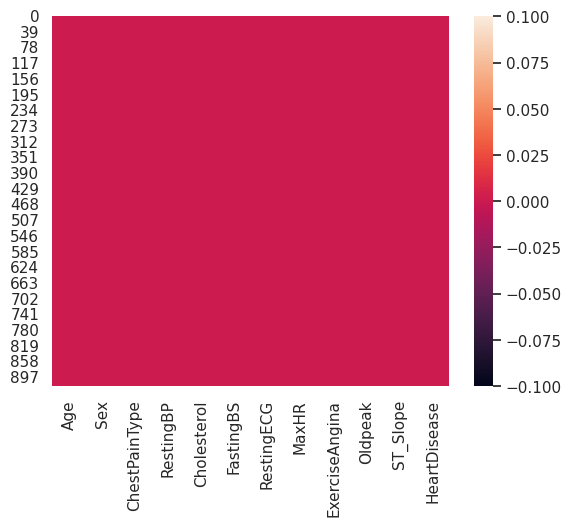

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.duplicated().sum()

0

# Analyze the Data

In [10]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

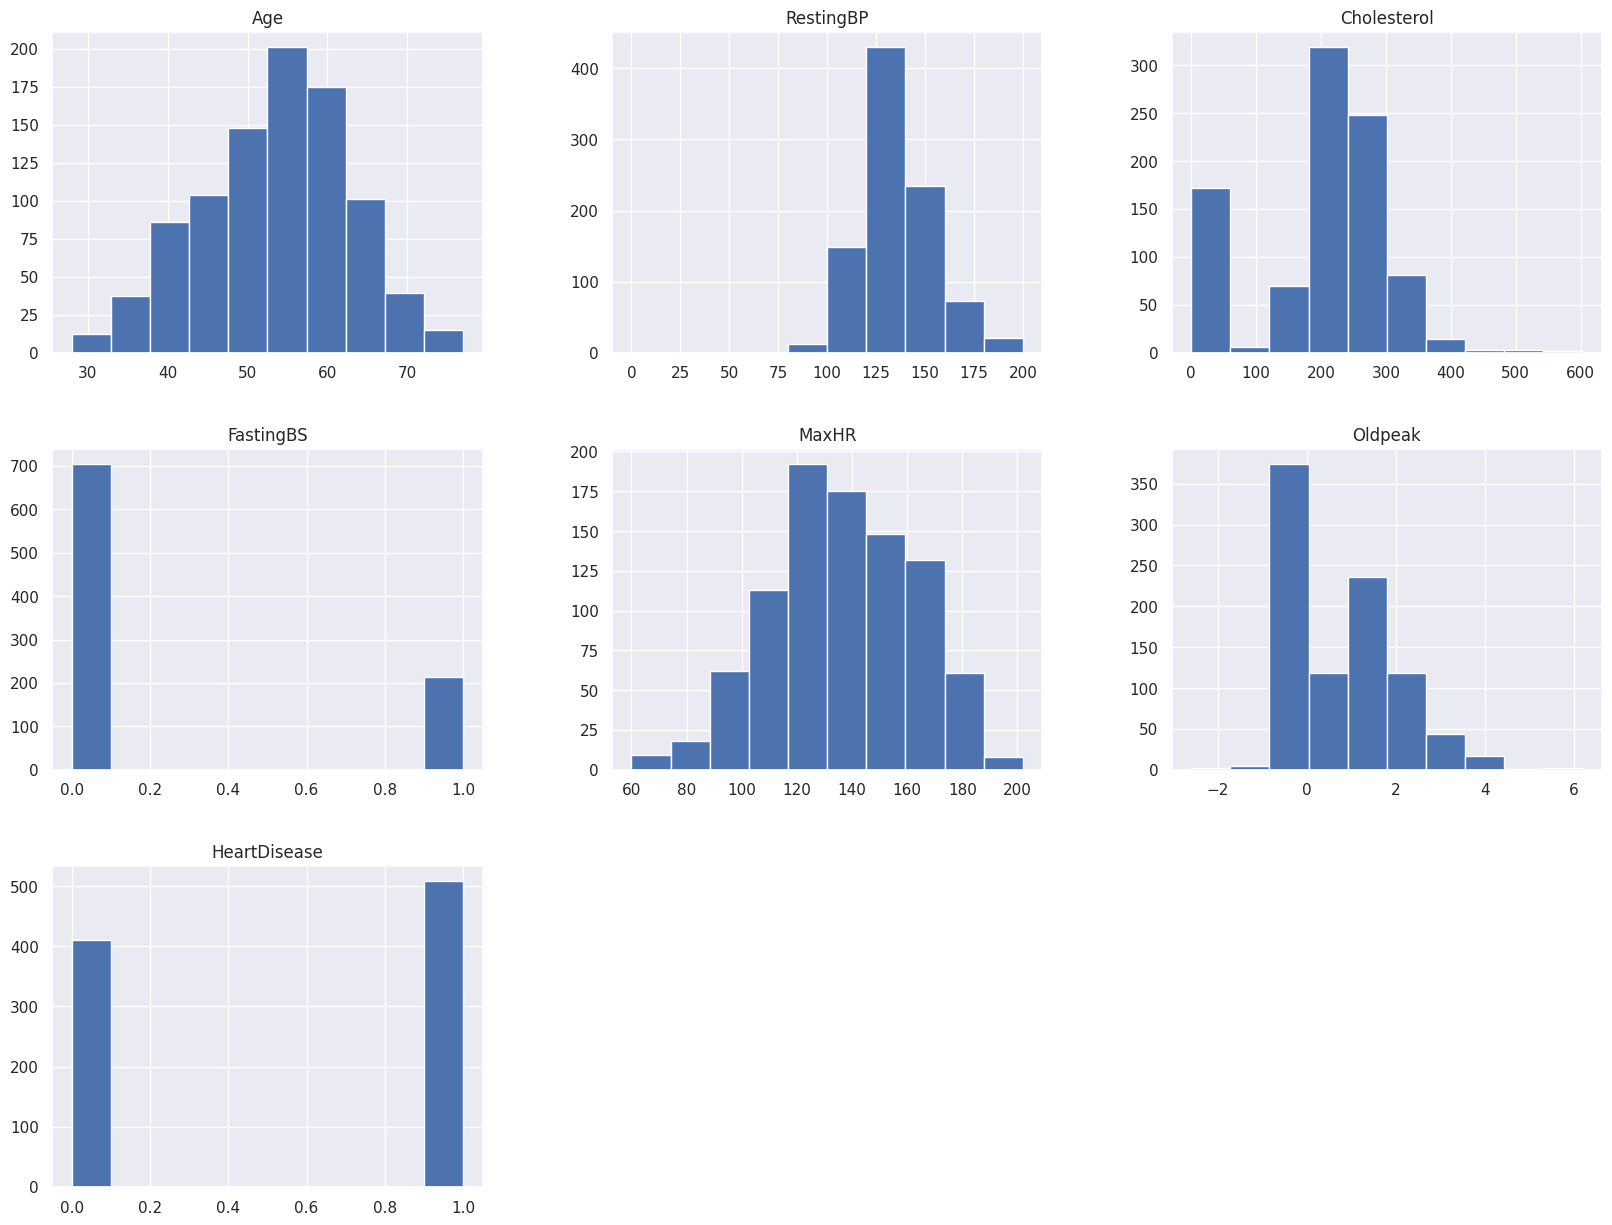

In [11]:
data.hist(figsize=(20,15))
plt.show()

In [12]:
cor = data.select_dtypes(include='number').corr()


<Axes: >

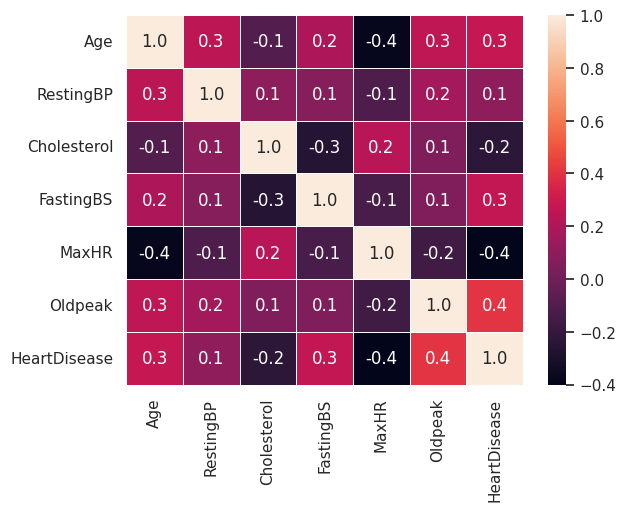

In [13]:
sns.heatmap( cor,annot= True , fmt = '.1f', linewidth = .5)

# Preprocessing the Data 

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
obj = data.select_dtypes(include = 'object')
non_obj = data.select_dtypes(exclude = 'object')

In [16]:
obj

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [17]:
for i in range(0, obj.shape[1]):
    obj.iloc[:,i]= encoder.fit_transform(obj.iloc[:,i])

In [18]:
obj

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [19]:
final_data = pd.concat([obj, non_obj], axis= 1)

In [20]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [21]:
final_data

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1


# Prediction Model


In [22]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
x = final_data.drop(['HeartDisease'], axis=1)
y = final_data['HeartDisease'] 

In [24]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [26]:
def all(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(confusion_matrix(pred,y_test))
    print( classification_report(pred, y_test))

In [27]:
model1 = KNeighborsClassifier()
print ("Model : ",model1)
all(model1)


Model :  KNeighborsClassifier()
[[55 33]
 [22 74]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        88
           1       0.69      0.77      0.73        96

    accuracy                           0.70       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.70      0.70      0.70       184



In [28]:
model1 = DecisionTreeClassifier()
print ("Model : ",model1)
all(model1)


Model :  DecisionTreeClassifier()
[[65 24]
 [12 83]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        89
           1       0.78      0.87      0.82        95

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



In [29]:
model1 = GaussianNB()
print ("Model : ",model1)
all(model1)

Model :  GaussianNB()
[[65 17]
 [12 90]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [30]:
model1 = SVC()
print ("Model : ",model1)
all(model1)

Model :  SVC()
[[54 35]
 [23 72]]
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        89
           1       0.67      0.76      0.71        95

    accuracy                           0.68       184
   macro avg       0.69      0.68      0.68       184
weighted avg       0.69      0.68      0.68       184



In [31]:
model1 = RandomForestClassifier()
print ("Model : ",model1)
all(model1)

Model :  RandomForestClassifier()
[[67 13]
 [10 94]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        80
           1       0.88      0.90      0.89       104

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [32]:
model1 = GradientBoostingClassifier()
print ("Model : ",model1)
all(model1)

Model :  GradientBoostingClassifier()
[[69 15]
 [ 8 92]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        84
           1       0.86      0.92      0.89       100

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

